In [1]:
%%latex
\tableofcontents

<IPython.core.display.Latex object>

# Setup

## Import Libraries

In [2]:
print ('Install Packages')

import sys, copy, math, time, os

print ('Python version: {}'.format(sys.version))

#from collections import Counter

import numpy as np
print ('NumPy version: {}'.format(np.__version__))
np.set_printoptions(suppress=True)

import scipy as sc
print ('SciPy version:  {}'.format(sc.__version__))

import tensorflow as tf
print ('TensorFlow version:  {}'.format(tf.__version__))
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

from tensorflow import keras
print ('Keras version:  {}'.format(keras.__version__))

from keras import layers
import keras.backend as K
from keras.layers import IntegerLookup
from keras.layers import Normalization
from keras.layers import StringLookup
from keras.utils import get_custom_objects
from keras.utils import tf_utils

from keras.models import Sequential
from keras.layers import Dense

#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

import pandas as pd
print ('Pandas version:  {}'.format(pd.__version__))
pd.set_option('display.max_rows', 500)

import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
#    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

import matplotlib.pyplot as plt
%matplotlib inline

# Library for reading Microsoft Access files
#import pandas_access as mdb

import sklearn
print ('SciKit-Learn version: {}'.format(sklearn.__version__))
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import class_weight

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

import imblearn
print ('Imbalanced-Learn version: {}'.format(imblearn.__version__))
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier

#!pip install pydot

# Set Randomness.  Copied from https://www.kaggle.com/code/abazdyrev/keras-nn-focal-loss-experiments
import random
#np.random.seed(42) # NumPy
#random.seed(42) # Python
#tf.random.set_seed(42) # Tensorflow

import warnings
warnings.filterwarnings('ignore')

print ('Finished Installing Packages')

Install Packages
Python version: 3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:26:08) [Clang 14.0.6 ]
NumPy version: 1.24.2
SciPy version:  1.7.3


/Users/bburkman/miniforge3/envs/Tensorflow_2_11/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorFlow version:  2.11.0
Keras version:  2.11.0
Pandas version:  1.5.3
SciKit-Learn version: 1.2.2
Imbalanced-Learn version: 0.10.1
Finished Installing Packages


## Get Data

In [3]:
def Get_Data():
    print ('Get_Data()')
    data = pd.read_csv(
        '../../Big_Files/CRSS_Imputed_All_05_19_23.csv',
        low_memory=False
    )
    print ('data.shape: ', data.shape)
    
    print ('End Get_Data()')
    print ()
    return data

def Test_Get_Data():
    data = Get_Data()
    display (data.head())
    
#Test_Get_Data()

# Remove_Pedestrian_Crashes

In [4]:
def Remove_Pedestrian_Crashes(data):
    print ('Remove_Pedestrian_Crashes()')
    display(data.PEDS.value_counts())
    n = len(data[data.PEDS>0])
    print ('Removing %d crashes that involve a pedestrian.' % n)
    data = data[data.PEDS==0]
    return data

def Test_Remove_Pedestrian_Crashes():
    data = Get_Data()
    print (len(data))
    data = Remove_Pedestrian_Crashes(data)
    print (len(data))

#Test_Remove_Pedestrian_Crashes()

## Engineer Features

In [5]:
def Feature_Engineering_Cross_Two(data):
    print ('Feature_Engineering_Cross_Two')
    Pairs = [
        ['AGE', 'SEX', 'AGE_x_SEX'],
        ['AGE', 'SCH_BUS', 'AGE_x_SCH_BUS']
    ]
    for P in Pairs:
        data[P[2]] = data[P[0]].map(str) + '_x_' + data[P[1]].map(str)
    
    print ()
    return data
        

## Thin Features

In [6]:
def Thin_Features(data):
    print ('Thin_Features()')

    Merge = [
        'CASENUM',
        'VEH_NO',
        'PER_NO',        
    ]

    Accident = [
        'DAY_WEEK',
        'HOUR',
        'INT_HWY',
        'LGT_COND',
        'MONTH',
#        'PEDS',
        'PERMVIT',
        'PERNOTMVIT',
        'PJ',
        'PSU',
        'PVH_INVL',
        'REGION',
        'REL_ROAD',
        'RELJCT1',
        'RELJCT2',
        'SCH_BUS',
        'TYP_INT',
        'URBANICITY',
        'VE_FORMS',
        'VE_TOTAL',
        'WEATHER',
        'WRK_ZONE',
        'YEAR',
    ]
    
    Vehicle = [
        'BODY_TYP',
        'BUS_USE',
        'EMER_USE',
        'MAKE',
#        'MOD_YEAR',
        'MODEL',
        'NUMOCCS',
        'VALIGN',
        'VNUM_LAN',
        'VPROFILE',
        'VSPD_LIM',
#        'VSURCOND',
        'VTRAFCON',
        'VTRAFWAY',
    ]
    
    Person = [
        'AGE',
        'LOCATION',
        'PER_TYP',
        'SEX',
        'HOSPITAL',    
    ]

    Engineered = [
        'VEH_AGE',
        'AGE_x_SEX',
        'AGE_x_SCH_BUS'
    ]
    
    # Put features in alphabetical order
    Features = Accident + Vehicle + Person + Engineered
    Features = sorted(Features)
#    Features = Merge + Features
    
    data = data.filter(Features, axis=1)
    
    print ('data.shape: ', data.shape)
    
    print ('End Thin_Features()')
    print ()
        
    return data

def Test_Thin_Features():
    data = Get_Data()
    data = Thin_Features(data)
    for feature in data:
        display(data[feature].value_counts())
        
#Test_Thin_Features()

## Really Thin Features

In [7]:
def Really_Thin_Features(data):
    print ('Really_Thin_Features()')

    Merge = [
        'CASENUM',
        'VEH_NO',
        'PER_NO',        
    ]

    Accident = [
        'DAY_WEEK',
        'HOUR',
        'INT_HWY',
#        'LGT_COND',
        'MONTH',
#        'PEDS',
#        'PERMVIT',
#        'PERNOTMVIT',
        'PJ',
        'PSU',
#        'PVH_INVL',
        'REGION',
        'REL_ROAD',
        'RELJCT1',
#        'RELJCT2',
#        'SCH_BUS',
        'TYP_INT',
        'URBANICITY',
#        'VE_FORMS',
#        'VE_TOTAL',
        'WEATHER',
#        'WRK_ZONE',
        'YEAR',
    ]
    
    Vehicle = [
#        'BODY_TYP',
#        'BUS_USE',
#        'EMER_USE',
#        'MAKE',
#        'MOD_YEAR',
#        'MODEL',
#        'NUMOCCS',
        'VALIGN',
        'VNUM_LAN',
        'VPROFILE',
        'VSPD_LIM',
#        'VSURCOND',
        'VTRAFCON',
        'VTRAFWAY',
    ]
    
    Person = [
        'AGE',
#        'LOCATION',
#        'PER_TYP',
        'SEX',
        'HOSPITAL',    
    ]

    Engineered = [
#        'VEH_AGE',
        'AGE_x_SEX',
#        'AGE_x_SCH_BUS'
    ]
    
    # Put features in alphabetical order
    Features = Accident + Vehicle + Person + Engineered
    Features = sorted(Features)
#    Features = Merge + Features
    
    data = data.filter(Features, axis=1)
    
    print ('data.shape: ', data.shape)
    
    print ('End Thin_Features()')
    print ()
        
    return data

def Test_Really_Thin_Features():
    data = Get_Data()
    data = Really_Thin_Features(data)
    for feature in data:
        display(data[feature].value_counts())
        
#Test_Really_Thin_Features()

In [8]:
def Thin_to_Minimal_Features(data):
    print ('Thin_to_Minimal_Features()')

    Accident = [
        'DAY_WEEK',
        'HOUR',
#        'INT_HWY',
#        'LGT_COND',
        'MONTH',
#        'PEDS',
#        'PERMVIT',
#        'PERNOTMVIT',
        'PJ',
        'PSU',
#        'PVH_INVL',
        'REGION',
#        'REL_ROAD',
#        'RELJCT1',
#        'RELJCT2',
#        'SCH_BUS',
#        'TYP_INT',
        'URBANICITY',
#        'VE_FORMS',
#        'VE_TOTAL',
        'WEATHER',
#        'WRK_ZONE',
        'YEAR',
    ]
    
    Vehicle = [
#        'BODY_TYP',
#        'BUS_USE',
#        'EMER_USE',
#        'MAKE',
#        'MOD_YEAR',
#        'MODEL',
#        'NUMOCCS',
#        'VALIGN',
#        'VNUM_LAN',
#        'VPROFILE',
#        'VSPD_LIM',
#        'VSURCOND',
#        'VTRAFCON',
#        'VTRAFWAY',
    ]
    
    Person = [
#        'AGE',
#        'LOCATION',
#        'PER_TYP',
#        'SEX',
        'HOSPITAL',    
    ]

    Engineered = [
#        'VEH_AGE',
#        'AGE_x_SEX',
#        'AGE_x_SCH_BUS'
    ]
    
    # Put features in alphabetical order
    Features = Accident + Vehicle + Person + Engineered
    Features = sorted(Features)
#    Features = Merge + Features
    
    data = data.filter(Features, axis=1)
    
    print ('data.shape: ', data.shape)
    
    print ('End Thin_Features()')
    print ()
        
    return data

def Test_Thin_to_Minimal_Features():
    data = Get_Data()
    data = Thin_to_Minimal_Features(data)
    for feature in data:
        display(data[feature].value_counts())
        
#Test_Thin_to_Minimal_Features()

## Get Dummies

In [9]:
def Get_Dummies(data, target):
    print ('Get_Dummies')
    data = data.astype('category')
    Target = data.pop(target)
    data_Dummies = pd.get_dummies(data, prefix = data.columns)
    data_Dummies = data_Dummies.join(Target)
#    for feature in data_Dummies:
#        print (feature)
    print ()

    return data_Dummies

def Test_Get_Dummies():
    print ('Test_Get_Dummies')
    A = pd.DataFrame({
        'A': ['a', 'b', 'a'], 
        'B': ['b', 'a', 'c'], 
        'C': [1, 2, 3]})
    C = Get_Dummies(A, 'C')
    display(C)
    print ()

#Test_Get_Dummies()

## Test-Train Split
- We're using sklearn's train_test_split rather than Pandas's sample because the former has a 'stratify' option that will put the same proportion of HOSPITAL==1 into each set.

In [10]:
def Split_Data(data, target, test_size):
    print ('Split_Data()')
    X = data.drop(columns=[target])
    y = data[target]
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=test_size, 
        #random_state=42
    )
    
    a = y_train[y_train==1].shape[0]
    b = y_test[y_test==1].shape[0]
    print (
        x_train.shape, 
        y_train.shape, a, round((a/(a+b)*100),2), '%')
    print (
        x_test.shape, 
        y_test.shape, b, round((b/(a+b)*100),2), '%'
    )
    print ()
    
    return x_train, x_test, y_train, y_test

# Imbalanced Data Resampling

## Tomek Links

In [11]:
def Tomek_Links(X_train, y_train):
    print ('Tomek_Links()')
    M = len(y_train)
    N = len(y_train)
    n = len(y_train[y_train==1])
    p = (N-n)/n
    print ('Before Tomek Links:')
    print ('%d samples, %d hospitalized, %d not hospitalized' % (N, n, N-n))
    print ('%f percent of samples hospitalized' % (n/N*100))
    print ('There are %f negative samples for each positive.' % ((N-n)/n))
    print ()

    X_train, y_train = TomekLinks().fit_resample(X_train, y_train)
    N = len(y_train)
    n = len(y_train[y_train==1])
    p = (N-n)/n
    print ('After Tomek Links:')
    print ('%d samples, %d hospitalized, %d not hospitalized' % (N, n, N-n))
    print ('%f percent of samples hospitalized' % (n/N*100))
    print ('There are %f negative samples for each positive.' % ((N-n)/n))
    print ('Removed %d samples, or %.2f%% of the set.' % (M-N, (M-N)/M*100))
    print ()
    
    return X_train, y_train

## Condensed Nearest Neighbor

In [12]:
def Condensed_Nearest_Neighbour(X_train, y_train):
    print ('Condensed_Nearest_Neighbour()')
    N = X_train.shape[0]
    print ('X_train.shape before = ', X_train.shape)
    print ('y_train.shape before = ', y_train.shape)
    print ()
    cnn = CondensedNearestNeighbour(n_neighbors=None)
    X_train, y_train = cnn.fit_resample(X_train, y_train)
    n = X_train.shape[0]
    print ('X_train.shape after = ', X_train.shape)
    print ('y_train.shape after = ', y_train.shape)
    print ()
    print ('Removed %d samples, or %.2f%% of the set.' % (N-n, (N-n)/N*100))
    print ()
    
    return X_train, y_train

# Undersample Data
- These functions take the three versions of the dataset, which correspond to these names in the paper:
    - Thin (Hard)
    - Really_Thin (Medium)
    - Thin_to_Minimum (Easy)
- runs Tomek Links on them once, then again, and saves the results to file.
- Each of the three sets takes about 90 minutes to run on my laptop.

In [13]:
%%time
def Undersample_Data_Thin(round_text):
    print ('Undersample_Data_Thin()')
    data = Get_Data()
    data = data.astype('int64')
    target = 'HOSPITAL'
    data = Remove_Pedestrian_Crashes(data)
    data = Feature_Engineering_Cross_Two(data)
    data = Thin_Features(data)
    data = Get_Dummies(data, target)

    # Decrease set size, for debugging
#    X_train, X_test, y_train, y_test = Split_Data(data, target, 0.80)
#    data = X_train
#    data[target] = y_train
    
    X_train, X_test, y_train, y_test = Split_Data(data, target, 0.30)

    # CNN took 6 minutes at 99% decreased set size.  
#    X_train, y_train = Condensed_Nearest_Neighbour(X_train, y_train)

    # 413,913 samples before Tomek
    X_train.to_csv('../../Big_Files/X_train_Thin_before_Tomek' + round_text + '.csv', index=False)
    y_train.to_csv('../../Big_Files/y_train_Thin_before_Tomek' + round_text + '.csv', index=False)
    X_test.to_csv('../../Big_Files/X_test_Thin_before_Tomek' + round_text + '.csv', index=False)
    y_test.to_csv('../../Big_Files/y_test_Thin_before_Tomek' + round_text + '.csv', index=False)

    # Two rounds of Tomek took one hour 30 minutes
    X_train, y_train = Tomek_Links(X_train, y_train)
    # Write to csv and read back in, 
    #    so we can play with the stuff later without having to redo the Tomek Links, 
    #    which can take a long time.
    
    # 399,515 samples after Tomek, v1
    # 399,714  v2
    X_train.to_csv('../../Big_Files/X_train_Thin_after_Tomek' + round_text + '.csv', index=False)
    y_train.to_csv('../../Big_Files/y_train_Thin_after_Tomek' + round_text + '.csv', index=False)
    X_test.to_csv('../../Big_Files/X_test_Thin_after_Tomek' + round_text + '.csv', index=False)
    y_test.to_csv('../../Big_Files/y_test_Thin_after_Tomek' + round_text + '.csv', index=False)

    
    X_train, y_train = Tomek_Links(X_train, y_train)
    # 396,511 after Tomek twice v1
    # 396,718 v2
    X_train.to_csv('../../Big_Files/X_train_Thin_after_Tomek_Twice' + round_text + '.csv', index=False)
    y_train.to_csv('../../Big_Files/y_train_Thin_after_Tomek_Twice' + round_text + '.csv', index=False)
    X_test.to_csv('../../Big_Files/X_test_Thin_after_Tomek_Twice' + round_text + '.csv', index=False)
    y_test.to_csv('../../Big_Files/y_test_Thin_after_Tomek_Twice' + round_text + '.csv', index=False)
    print ()
    
def Undersample_Data_Really_Thin(round_text):
    print ('Undersample_Data_Really_Thin()')

    data = Get_Data()
    data = data.astype('int64')
    target = 'HOSPITAL'
    data = Remove_Pedestrian_Crashes(data)
    data = Feature_Engineering_Cross_Two(data)
    data = Really_Thin_Features(data)
    data = Get_Dummies(data, target)

    # Decrease set size, for debugging
#    X_train, X_test, y_train, y_test = Split_Data(data, target, 0.80)
#    data = X_train
#    data[target] = y_train
    
    X_train, X_test, y_train, y_test = Split_Data(data, target, 0.30)

    # CNN took 6 minutes at 99% decreased set size.  
#    X_train, y_train = Condensed_Nearest_Neighbour(X_train, y_train)

    # 413,913 Samples

    X_train.to_csv('../../Big_Files/X_train_Really_Thin_before_Tomek' + round_text + '.csv', index=False)
    y_train.to_csv('../../Big_Files/y_train_Really_Thin_before_Tomek' + round_text + '.csv', index=False)
    X_test.to_csv('../../Big_Files/X_test_Really_Thin_before_Tomek' + round_text + '.csv', index=False)
    y_test.to_csv('../../Big_Files/y_test_Really_Thin_before_Tomek' + round_text + '.csv', index=False)

    # Two rounds of Tomek took one hour 30 minutes
    X_train, y_train = Tomek_Links(X_train, y_train)
    # Write to csv and read back in, 
    #    so we can play with the stuff later without having to redo the Tomek Links, 
    #    which can take a long time.
    
    # 406,691 Samples v1
    # 406,781 v2
    X_train.to_csv('../../Big_Files/X_train_Really_Thin_after_Tomek' + round_text + '.csv', index=False)
    y_train.to_csv('../../Big_Files/y_train_Really_Thin_after_Tomek' + round_text + '.csv', index=False)
    X_test.to_csv('../../Big_Files/X_test_Really_Thin_after_Tomek' + round_text + '.csv', index=False)
    y_test.to_csv('../../Big_Files/y_test_Really_Thin_after_Tomek' + round_text + '.csv', index=False)
    
    # 405,288 Samples v1
    # 405,368 v2

    X_train, y_train = Tomek_Links(X_train, y_train)
    X_train.to_csv('../../Big_Files/X_train_Really_Thin_after_Tomek_Twice' + round_text + '.csv', index=False)
    y_train.to_csv('../../Big_Files/y_train_Really_Thin_after_Tomek_Twice' + round_text + '.csv', index=False)
    X_test.to_csv('../../Big_Files/X_test_Really_Thin_after_Tomek_Twice' + round_text + '.csv', index=False)
    y_test.to_csv('../../Big_Files/y_test_Really_Thin_after_Tomek_Twice' + round_text + '.csv', index=False)
    print ()
    
def Undersample_Data_Thin_to_Minimal(round_text):
    print ('Undersample_Data_Thin_to_Minimal()')

    data = Get_Data()
    data = data.astype('int64')
    target = 'HOSPITAL'
    data = Remove_Pedestrian_Crashes(data)
    data = Feature_Engineering_Cross_Two(data)
    data = Thin_to_Minimal_Features(data)
    data = Get_Dummies(data, target)

    # Decrease set size, for debugging
#    X_train, X_test, y_train, y_test = Split_Data(data, target, 0.80)
#    data = X_train
#    data[target] = y_train
    
    X_train, X_test, y_train, y_test = Split_Data(data, target, 0.30)

    # CNN took 6 minutes at 99% decreased set size.  
#    X_train, y_train = Condensed_Nearest_Neighbour(X_train, y_train)
    X_train.to_csv('../../Big_Files/X_train_Thin_to_Minimal_before_Tomek' + round_text + '.csv', index=False)
    y_train.to_csv('../../Big_Files/y_train_Thin_to_Minimal_before_Tomek' + round_text + '.csv', index=False)
    X_test.to_csv('../../Big_Files/X_test_Thin_to_Minimal_before_Tomek' + round_text + '.csv', index=False)
    y_test.to_csv('../../Big_Files/y_test_Thin_to_Minimal_before_Tomek' + round_text + '.csv', index=False)


    # Two rounds of Tomek took one hour 30 minutes
    X_train, y_train = Tomek_Links(X_train, y_train)
    # Write to csv and read back in, 
    #    so we can play with the stuff later without having to redo the Tomek Links, 
    #    which can take a long time.
    X_train.to_csv('../../Big_Files/X_train_Thin_to_Minimal_after_Tomek' + round_text + '.csv', index=False)
    y_train.to_csv('../../Big_Files/y_train_Thin_to_Minimal_after_Tomek' + round_text + '.csv', index=False)
    X_test.to_csv('../../Big_Files/X_test_Thin_to_Minimal_after_Tomek' + round_text + '.csv', index=False)
    y_test.to_csv('../../Big_Files/y_test_Thin_to_Minimal_after_Tomek' + round_text + '.csv', index=False)


    X_train, y_train = Tomek_Links(X_train, y_train)
    X_train.to_csv('../../Big_Files/X_train_Thin_to_Minimal_after_Tomek_Twice' + round_text + '.csv', index=False)
    y_train.to_csv('../../Big_Files/y_train_Thin_to_Minimal_after_Tomek_Twice' + round_text + '.csv', index=False)
    X_test.to_csv('../../Big_Files/X_test_Thin_to_Minimal_after_Tomek_Twice' + round_text + '.csv', index=False)
    y_test.to_csv('../../Big_Files/y_test_Thin_to_Minimal_after_Tomek_Twice' + round_text + '.csv', index=False)
    print ()
    
#Undersample_Data_Thin('_v1')
#Undersample_Data_Really_Thin('_v1')
#Undersample_Data_Thin_to_Minimal('_v1')

#Undersample_Data_Thin('_v2')
#Undersample_Data_Really_Thin('_v2')
#Undersample_Data_Thin_to_Minimal('_v2')



CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


## Undersampling Results
- Start with 747,342 samples
- Remove 33,776 samples iwth pedestrians to get 713,566 samples
- Split 70/30 to have 499,496 samples in training set, 214,070 in test set
- In training set, 499,496 samples, 78,926 hospitalized, 420,570 not hospitalized


| Feature Set | Random Seed | Tomek Round | # Samples Removed | % Samples Removed |
| --- | --- | --- | --- | --- |
| Hard | 1 | 1 | 17,851 | 3.57 |
| Hard | 2 | 1 | 7,794 | 3.56 |
| Hard | 1 | 2 | 3,664 | 0.76 |
| Hard | 2 | 2 | 3,751 | 0.78 |
| Medium | 1 | 1 | 8,839 | 1.77 |
| Medium | 2 | 1 | 8.825 | 1.77 |
| Medium | 1 | 2 | 1,736 | 0.35 |
| Medium | 2 | 2 | 1,656 | 0.34 |
| Easy | 1 | 1 | 6 | 0.00 |
| Easy | 2 | 1 | 3 | 0.00 |
| Easy | 1 | 2 | 0 | 0.00 |
| Easy | 2 | 2 | 0 | 0.00 |


 

# Loss Functions

## Alpha Weighted Binary Crossentropy

In [14]:
def alpha_weighted_binary_crossentropy_with_parameter(alpha = 0.5):
    def alpha_weighted_binary_crossentropy(y_true, y_pred):
        y_true = tf.cast(y_true, dtype=y_pred.dtype)

        binary_crossentropy = keras.backend.binary_crossentropy(y_true, y_pred)
        weights = tf.where(tf.equal(y_true,1),alpha, 1-alpha)
        product = tf.multiply(binary_crossentropy, weights)
        loss = keras.backend.mean(product)
        return loss
    return alpha_weighted_binary_crossentropy


In [15]:
def alpha_weighted_binary_crossentropy_with_class_weight_parameters(weight_0 = 1.0, weight_1 = 1.0):
    # Weights for each class = (nSamples Total)/(2* (nSamples in Class))
    def alpha_weighted_binary_crossentropy(y_true, y_pred):
        y_true = tf.cast(y_true, dtype=y_pred.dtype)
        binary_crossentropy = keras.backend.binary_crossentropy(y_true, y_pred, from_logits=False)
        weights = tf.where(tf.equal(y_true,1),weight_1, weight_0)
        product = tf.multiply(binary_crossentropy, weights)
        loss = keras.backend.mean(product)
        return loss
    return alpha_weighted_binary_crossentropy


## Focal Loss

In [16]:
def focal_loss(y_true, y_pred):
    # The dataset has  259077  elements.
    # The target group has  31891  elements.
    # Our target is  12.3095 % of the dataset.
    # There are  8.12  negative elements for each positive.    
#    p = 8.12
    p = 5.94

    alpha = (p/(p+1))*1.0

    gamma_1 = 0.0 # Must be float for the tf.math.pow() function to work.
    gamma_2 = 0.0
    y_true = tf.cast(y_true, dtype=y_pred.dtype)
    binary_crossentropy = keras.backend.binary_crossentropy(y_true, y_pred)
#    print (binary_crossentropy.numpy())
    weights = tf.where(tf.equal(y_true,1),alpha, 1-alpha)
#    print (weights.numpy())
    focal = tf.where(tf.equal(y_true,1), (1.0-y_pred), (y_pred))
    power = tf.where(tf.equal(y_true,1), gamma_1, gamma_2)
    focal_power = tf.math.pow(focal,power)
#    print (focal.numpy())
#    print (power.numpy())
#    print (focal_power.numpy())
    product = tf.multiply(binary_crossentropy, weights)
    focal_power_product = tf.multiply(product, focal_power)
#    print (focal_power_product.numpy())
    loss = keras.backend.mean(focal_power_product)
#    print (loss.numpy())
    return loss

## Focal Loss with Parameters
- Adapted from https://www.kaggle.com/code/abazdyrev/keras-nn-focal-loss-experiments

In [17]:
def focal_loss_with_parameters(alpha = 0.5, gamma_0=0.0, gamma_1=0.0):
    def focal_loss(y_true, y_pred):
        y_true = tf.cast(y_true, dtype=y_pred.dtype)
#        tf.clip_by_value(y_pred, 0.00001, 0.99999) # Make sure we don't blow up the logarithm
        binary_crossentropy = keras.backend.binary_crossentropy(y_true, y_pred)
        weights = tf.where(tf.equal(y_true,1),alpha, 1.0-alpha)
        focal = tf.where(tf.equal(y_true,1), (1.0-y_pred), (y_pred))
        power = tf.where(tf.equal(y_true,0), gamma_0, gamma_1)
        focal_power = tf.math.pow(focal,power)
        product = tf.multiply(binary_crossentropy, weights)
        focal_power_product = tf.multiply(product, focal_power)
#        tf.clip_by_value(focal_power_product, 0.00001, 0.99999)
        loss = keras.backend.mean(focal_power_product)
        if math.isnan(loss):
            print ('loss is nan')
        return loss
    
    return focal_loss

get_custom_objects().update({'focal_loss_with_parameters': focal_loss_with_parameters()})

In [18]:
def focal_loss_with_parameters_2(alpha=.25, gamma=2.0):
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(K.epsilon()+pt_1))-K.mean((1-alpha) * K.pow( pt_0, gamma) * K.log(1. - pt_0 + K.epsilon()))
    return focal_loss_fixed


## Test Loss Functions

In [19]:
def Test_Loss_Functions():
    
    ### Data as list y_test and y_prob
    y_test = [0.0]*500 + [1.0]*500
    y_test_binary = [0]*500 + [1]*500
#    y_test = [0.0, 1.0]*5
#    y_test_binary = [0,1]*5
#    y_prob = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.99, 0.999]
    y_prob = [random.random() for x in range (1000)]
#    print (y_prob)
    
    ### Data as tensors y_true and y_pred
    y_true = np.array(y_test, dtype=np.float32)
    y_true = tf.convert_to_tensor(y_true)
    y_pred = np.array(y_prob, dtype=np.float32)
    y_pred = tf.convert_to_tensor(y_pred)

    ####################################################
    print ('Test with p==1.0, alpha = 0.5, gamma = 0.0')

    ### Calculate binary crossentropy by hand
    BCE = [-(y_test[i] * math.log(y_prob[i]) + (1 - y_test[i]) * math.log(1 - y_prob[i])) for i in range (10)]
    Class_Weights = [1.0,1.0]
    Weights = [Class_Weights[y_test_binary[i]] for i in range(10)]
    Product = [BCE[i] * Weights[i] for i in range (10)]
    loss = sum(Product)/len(Product)
    print (loss, "  Hand-calculated BCE loss")
    
    ### Calculate binary crossentropy like I did in my custom loss functions
    binary_crossentropy = keras.backend.binary_crossentropy(y_true, y_pred, from_logits=False)
#    display(binary_crossentropy.numpy())
    loss = keras.backend.mean(binary_crossentropy).numpy()
    print (loss, "  My custom AWBCE function's no-alpha backend")
    
    ### Calculate binary crossentropy using my custom loss function
    loss_function = alpha_weighted_binary_crossentropy_with_parameter(alpha = 0.5)
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, '  My custom one-parameter AWBCE function')
    
    ### Calculate binary crossentropy using my custom loss function
    # Weights for each class = (nSamples Total)/(2* (nSamples in Class))
    loss_function = alpha_weighted_binary_crossentropy_with_class_weight_parameters(weight_0 = 1.0, weight_1 = 1.0)
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, '  My custom two-parameter AWBCE function')
    
    ### Calculate binary crossentropy using Keras's loss function
    bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
    loss = bce(y_true, y_pred).numpy()
    print (loss, "  Keras's BCE function")
    
    ### Calculate the same value using the BinaryFocalCrossentropy function
    loss_function = tf.keras.losses.BinaryFocalCrossentropy(
        apply_class_balancing = True, 
        alpha = 0.5,
        gamma = 0.0, 
        from_logits=False
    )
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, "  Keras's BFC function")
    
    ### Calculate focal loss using my custom loss function
    loss_function = focal_loss_with_parameters(0.5, 0.0, 0.0)
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, '  My BFC function with gamma=0.0')
    
    ####################################################
    print ()
    print ('Test with p = 3.0, alpha = 0.75, gamma = 0.0')
    
    ### Calculate binary crossentropy using my custom loss function
    loss_function = alpha_weighted_binary_crossentropy_with_parameter(alpha = 0.75)
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, '  My custom one-parameter AWBCE function')
    
    ### Calculate binary crossentropy using my custom loss function
    # Weights for each class = (nSamples Total)/(2* (nSamples in Class))
    loss_function = alpha_weighted_binary_crossentropy_with_class_weight_parameters(weight_0 = 2.0/3.0, weight_1 = 2.0)
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, '  My custom two-parameter AWBCE function')
    
    ### Calculate the same value using the BinaryFocalCrossentropy function
    loss_function = tf.keras.losses.BinaryFocalCrossentropy(
        apply_class_balancing = True, 
        alpha = 0.75,
        gamma = 0.0, 
        from_logits=False
    )
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, "  Keras's BFC function")
    
    ### Calculate focal loss using my custom loss function
    loss_function = focal_loss_with_parameters(0.75, 0.0, 0.0)
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, '  My BFC function with gamma=0.0')
    
    ####################################################
    print ()
    print ('Test with alpha = 0.8, gamma = 0.0')
    
    ### Calculate the same value using the BinaryFocalCrossentropy function
    loss_function = tf.keras.losses.BinaryFocalCrossentropy(
        apply_class_balancing = True, 
        alpha = 0.8,
        gamma = 0.0, 
#        from_logits=False
    )
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, "  Keras's BFC function")
    
    ### Calculate focal loss using my custom loss function
    loss_function = focal_loss_with_parameters(0.8, 0.0, 0.0)
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, '  My BFC function')

    ####################################################
    print ()
    print ('Test with alpha = 0.8, gamma = 2.0')
    
    ### Calculate the same value using the BinaryFocalCrossentropy function
    loss_function = tf.keras.losses.BinaryFocalCrossentropy(
        apply_class_balancing = True, 
        alpha = 0.8,
        gamma = 2.0, 
#        from_logits=False
    )
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, "  Keras's BFC function")
    
    ### Calculate focal loss using my custom loss function
    loss_function = focal_loss_with_parameters(0.8, 2.0, 2.0)
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, '  My BFC function with gamma=2.0')

    ####################################################
    print ()
    print ('Test with p = 1.0, alpha = 0.5, gamma = 2.0')
    
    ### Calculate the same value using the BinaryFocalCrossentropy function
    loss_function = tf.keras.losses.BinaryFocalCrossentropy(
        apply_class_balancing = True, 
        alpha = 0.5,
        gamma = 2.0, 
#        from_logits=False
    )
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, "  Keras's BFC function")
    
    ### Calculate focal loss using my custom loss function
    loss_function = focal_loss_with_parameters(0.5, 2.0, 2.0)
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, '  My BFC function with gamma=2.0')

    ##################################################################
    print ()
    print ("Test Keras's BFC Function with different values of alpha")
    
    ### Calculate the same value using the BinaryFocalCrossentropy function
    loss_function = tf.keras.losses.BinaryFocalCrossentropy(
        apply_class_balancing = True, 
        alpha = 0.1,
        gamma = 0.0, 
#        from_logits=False
    )
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, "  Keras's BFC function")
    
    ### Calculate the same value using the BinaryFocalCrossentropy function
    loss_function = tf.keras.losses.BinaryFocalCrossentropy(
        apply_class_balancing = True, 
        alpha = 0.5,
        gamma = 0.0, 
        from_logits=False
    )
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, "  Keras's BFC function")
    
    ### Calculate the same value using the BinaryFocalCrossentropy function
    loss_function = tf.keras.losses.BinaryFocalCrossentropy(
        apply_class_balancing = True, 
        alpha = 0.9,
        gamma = 0.0, 
        from_logits=False
    )
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, "  Keras's BFC function")
    

    
    
    
#Test_Loss_Functions()

# Models

## Another Keras Binary Classification Model
https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/

In [20]:
def Keras_Binary_Focal_Crossentropy(X_train, X_test, y_train, y_test, alpha, gamma, epochs, filename, title):
    print ('Keras_Binary_Focal_Crossentropy')
    print ('alpha = ', alpha, ', gamma = ', gamma)
    print ()
    loss_function = tf.keras.losses.BinaryFocalCrossentropy(
        apply_class_balancing=True,
        alpha=alpha,
        gamma=gamma,
#        from_logits=False,
#        label_smoothing=0.0,
#        axis=-1,
#        reduction=losses_utils.ReductionV2.AUTO,
#        name='binary_focal_crossentropy'
    )   
    
    # create model
    model = Sequential()
    model.add(Dense(60, input_shape=(X_train.shape[-1],), activation='relu'))
#    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))    
    # Compile model
    metrics = [
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall"),
#        F1_Metric,
    ]
    model.compile(loss=loss_function, optimizer=tf.keras.optimizers.Adam(), metrics=metrics)
    estimator = KerasClassifier(
        model=model, 
#        random_state=42,
        metrics=metrics,
        batch_size=128, 
        verbose=0,
        epochs=epochs,
    )
    
    # Fit model
    estimator.fit(
        X_train, 
        y_train.values.ravel(),
#        class_weight={0:(1+r_target)/(2*r_target), 1:(1+r_target)/(2*1)},
    )
    
    # Test on training set for overfit
    y_proba = estimator.predict_proba(X_train)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_train, y_proba, y_pred, filename + '_Train', title)  
    
    # Test on Test Set
    y_proba = estimator.predict_proba(X_test)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_test, y_proba, y_pred, filename + '_Test', title)
    
    print ()
    return 0    

## Our Binary Focal Crossentropy Classification Model

In [21]:
def Our_Binary_Focal_Crossentropy(X_train, X_test, y_train, y_test, alpha, gamma_0, gamma_1, epochs, filename, title):
    print ('Our_Binary_Focal_Crossentropy')
    print ('alpha = ', alpha, ' gamma_0 = ', gamma_0, ', gamma_1 = ', gamma_1)

#    alpha_target = r_target/(r_target+1)
    loss_function = focal_loss_with_parameters(alpha, gamma_0, gamma_1)
#    loss_function = focal_loss_with_parameters_2(alpha_target, gamma)
    
    # create model
    model = Sequential()
    model.add(Dense(60, input_shape=(X_train.shape[-1],), activation='relu'))
#    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))    
    # Compile model
    model.compile(loss=loss_function, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
    metrics = [
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall"),
#        F1_Metric,
    ]
    estimator = KerasClassifier(
        model=model, 
#        random_state=42,
        metrics=metrics,
        batch_size=128, 
        verbose=0,
        epochs=epochs,
    )
    
    # Fit model
    estimator.fit(
        X_train, 
        y_train.values.ravel(),
#        class_weight={0:(1+r_target)/(2*r_target), 1:(1+r_target)/(2*1)},
    )

    # Test on training set for overfit
    y_proba = estimator.predict_proba(X_train)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_train, y_proba, y_pred, filename + '_Train', title)  
    
    
    # Test on Test Set
    y_proba = estimator.predict_proba(X_test)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_test, y_proba, y_pred, filename + '_Test', title)
    
    print ()
    return 0    

## AdaBoost Model
https://stackoverflow.com/questions/39063676/how-to-boost-a-keras-based-neural-network-using-adaboost
- model.predict_proba(X_test) returns two columns, 
    - the first the probability that the sample is in class 0, 
    - and the second the probability that the sample is in class 1.
    - We just want the second column.

In [22]:
def AdaBoost(X_train, X_test, y_train, y_test, filename, title):
    print ('AdaBoost() ', filename)
    model = AdaBoostClassifier(n_estimators=100)
    model.fit(
        X_train, 
        y_train.values.ravel(),
    )
    
    # Test on training set for overfit
    y_proba = model.predict_proba(X_train)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_train, y_proba, y_pred, filename + '_Train', title)  
    
    # Test on Test Set
    y_proba = model.predict_proba(X_test)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_test, y_proba, y_pred, filename + '_Test', title)
    
    print ()
    return model    

### Ensembles of Classifiers
https://imbalanced-learn.org/stable/ensemble.html#bagging-classifier

with arguments based on the documentation examples

https://imbalanced-learn.org/stable/auto_examples/ensemble/plot_comparison_ensemble_classifier.html#sphx-glr-auto-examples-ensemble-plot-comparison-ensemble-classifier-py

## Bagging Classifier

In [23]:
def Bagging(X_train, X_test, y_train, y_test, filename, title):
    print ('Bagging() ', filename)
    model = BalancedBaggingClassifier(
#        random_state=42
    )
    model.fit(
        X_train, 
        y_train.values.ravel(),
    )
    
    # Test on training set for overfit
    y_proba = model.predict_proba(X_train)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_train, y_proba, y_pred, filename + '_Train', title)  
    
    # Test on Test Set
    y_proba = model.predict_proba(X_test)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_test, y_proba, y_pred, filename + '_Test', title)

    print ()
    return model

## Balanced Random Forest Classifier

In [24]:
def Balanced_Random_Forest_Classifier(X_train, X_test, y_train, y_test, alpha, filename, title):
    print ('Balanced Random Forest Classifier ', filename)
    print ('alpha = ', alpha)
    print ()
    model = BalancedRandomForestClassifier(
        bootstrap = True, ccp_alpha = 0.0, criterion = 'gini', 
        max_depth = None,
#        max_depth = 40, 
        max_features = 'sqrt', 
        max_leaf_nodes = None,
#        max_leaf_nodes = 10000,  
        max_samples = None, 
        min_impurity_decrease = 0.0, 
        min_samples_leaf = 1, 
        min_samples_split = 2, 
        min_weight_fraction_leaf = 0.0, 
        n_estimators = 100, 
#        n_estimators = 1000, 
        n_jobs = None, 
        oob_score = False, 
        random_state = None, 
        replacement = False, 
        sampling_strategy = 'auto', 
        verbose = 0, 
        warm_start = False,
        class_weight = {0:1-alpha, 1:alpha}
    )
    model.fit(
        X_train, 
        y_train.values.ravel(),
    )
    print ()
    print ('model.get_params()')
    print (model.get_params())
    print ()
    
    print ('[estimator.get_depth() for estimator in model.estimators_]')
    print ([estimator.get_depth() for estimator in model.estimators_])
    print ()
    print ('[estimator.get_n_leaves() for estimator in model.estimators_]')
    print ([estimator.get_n_leaves() for estimator in model.estimators_])
    print ()
    
    # Test on training set for overfit
    y_proba = model.predict_proba(X_train)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_train, y_proba, y_pred, filename + '_Train', title)  
    
    y_proba = model.predict_proba(X_test)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_test, y_proba, y_pred, filename + '_Test', title)
    
    
    print ()
    return model    


## RUSBoost Classifier

In [25]:
def RUSBoost_Classifier(X_train, X_test, y_train, y_test, estimator, filename, title):
    print ('RUSBoost Classifier ', filename)
    model = RUSBoostClassifier(
        n_estimators=1000, 
        estimator=estimator,
        algorithm='SAMME.R', 
#        random_state=42
    )
    model.fit(
        X_train, 
        y_train.values.ravel(),
    )
    
    # Test on training set for overfit
    y_proba = model.predict_proba(X_train)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_train, y_proba, y_pred, filename + '_Train', title)  
    
    # Test on test data, to test for underfit
    y_proba = model.predict_proba(X_test)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_test, y_proba, y_pred, filename + '_Test', title)

    print ()
    return model    


## Easy Ensemble Classifier (Adaboost)

In [26]:
def Easy_Ensemble_Classifier(X_train, X_test, y_train, y_test, filename, title):
    print ('Easy Ensemble Classifier ', filename)
    estimator = AdaBoostClassifier(n_estimators=10)
    model = EasyEnsembleClassifier(n_estimators=10, estimator=estimator)
    model.fit(
        X_train, 
        y_train.values.ravel(),
    )

    # Test on training set for overfit
    y_proba = model.predict_proba(X_train)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_train, y_proba, y_pred, filename + '_Train', title)  
    
    # Test on test data, to test for underfit
    y_proba = model.predict_proba(X_test)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_test, y_proba, y_pred, filename + '_Test', title)
    
    print ()
    return model    

## Logistic Regression

In [27]:
def Logistic_Regression_Classifier(X_train, X_test, y_train, y_test, alpha, filename, title):
    print ('Logistic Regression Classifier ', filename)
    model = LogisticRegression(
#        class_weight={0:(1+r_target)/(2*r_target), 1:(1+r_target)/(2*1)}
        class_weight = {0:1-alpha, 1:alpha},
        max_iter=1000,
#        random_state=42,
    )
    model.fit(
        X_train, 
        y_train.values.ravel(),
    )

    # Test on training set for overfit
    y_proba = model.predict_proba(X_train)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_train, y_proba, y_pred, filename + '_Train', title)  
    
    # Test on test data, to test for underfit
    y_proba = model.predict_proba(X_test)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_test, y_proba, y_pred, filename + '_Test', title)
    
    print ()
    return model    

# Evaluate Models

In [28]:
def Chart_and_Plots(y_test, y_proba, y_pred, filename, title):
    
    Analyze_Prediction(y_test, y_proba, filename, title)
    Plot_Prediction(y_test, y_proba, filename, title)
    Plot_Prediction_Wide(y_test, y_proba, filename, title)
    ROC(y_test, y_proba, [], filename)
    
    y_test, y_proba_New, y_pred = Linear_Transform_y_proba_Specified(y_test, y_proba, 0.0, 1.0)
    Filename = filename + '_Transformed_100'
    Analyze_Prediction(y_test, y_proba_New, Filename, title)
    Plot_Prediction(y_test, y_proba_New, Filename, title)
    Plot_Prediction_Wide(y_test, y_proba_New, Filename, title)
    ROC(y_test, y_proba_New, [], Filename)

    y_test, y_proba_New, y_pred = Linear_Transform_y_proba_Specified(y_test, y_proba, 0.01,0.99)
    Filename = filename + '_Transformed_98'
    Analyze_Prediction(y_test, y_proba_New, Filename, title)
    Plot_Prediction(y_test, y_proba_New, Filename, title)
    Plot_Prediction_Wide(y_test, y_proba_New, Filename, title)
    ROC(y_test, y_proba_New, [], Filename)

    y_test, y_proba_New, y_pred = Linear_Transform_y_proba_Specified(y_test, y_proba, 0.025,0.975)
    Filename = filename + '_Transformed_95'
    Analyze_Prediction(y_test, y_proba_New, Filename, title)
    Plot_Prediction(y_test, y_proba_New, Filename, title)
    Plot_Prediction_Wide(y_test, y_proba_New, Filename, title)
    ROC(y_test, y_proba_New, [], Filename)

    
    print ()
    

In [29]:
def Shift_y_proba(y_test, y_proba, y_pred, filename):
    print ('Shift_y_proba()')
    print ()
    N_median = np.median(y_proba[np.array(y_test)==0])
    P_median = np.median(y_proba[np.array(y_test)==1])
    center = (N_median + P_median)/2
    print ('N_median = %.3f, P_median = %.3f, center = %.3f' % (N_median, P_median, center))

    y_proba = y_proba - center + 0.5
    y_proba = np.where (y_proba < 0.0, 0.0, y_proba)
    y_proba = np.where (y_proba > 1.0, 1.0, y_proba)
    y_pred = K.round(y_proba)

    N_median = np.median(y_proba[np.array(y_test)==0])
    P_median = np.median(y_proba[np.array(y_test)==1])
    center = (N_median + P_median)/2
    print ('N_median = %.3f, P_median = %.3f, center = %.3f' % (N_median, P_median, center))
    
    print ()
    
    return y_test, y_proba, y_pred, filename
    

In [30]:
def Linear_Transform_y_proba(y_test, y_proba):
    print ('Linear_Transform_y_proba()')
    print ()
    
    # I considered two methods.  
    # One was to take the medians of the negative and positive classes and transform them to 0.25 and 0.75.
    # That didn't always work the way I wanted.  
    # Then I tried taking the 0.05 quantile to 0.05 and the 0.95 quantile to 0.95.
    
#    N_median = np.median(y_proba[np.array(y_test)==0])
#    P_median = np.median(y_proba[np.array(y_test)==1])
#    center = (N_median + P_median)/2
#    print ('N_median = %.3f, P_median = %.3f, center = %.3f' % (N_median, P_median, center))
#    y_proba = 0.25/(center - N_median) * (y_proba - center) + 0.5

    
    a = np.quantile(y_proba[np.array(y_test)==0],0.025)
    b = np.quantile(y_proba[np.array(y_test)==1],0.975)
    print ('a = %.3f, b = %.3f' % (a, b))
    y_proba = 1/(b-a) * (y_proba - a)
    
    y_proba = np.where (y_proba < 0.0, 0.0, y_proba)
    y_proba = np.where (y_proba > 1.0, 1.0, y_proba)
    y_pred = K.round(y_proba)

    print ()
    
    return y_test, y_proba, y_pred

In [31]:
def Linear_Transform_y_proba_Specified(y_test, y_proba, left, right):
    print ('Linear_Transform_y_proba()')
    print ()
    
    # I considered two methods.  
    # One was to take the medians of the negative and positive classes and transform them to 0.25 and 0.75.
    # That didn't always work the way I wanted.  
    # Then I tried taking the 0.05 quantile to 0.05 and the 0.95 quantile to 0.95.
    
#    N_median = np.median(y_proba[np.array(y_test)==0])
#    P_median = np.median(y_proba[np.array(y_test)==1])
#    center = (N_median + P_median)/2
#    print ('N_median = %.3f, P_median = %.3f, center = %.3f' % (N_median, P_median, center))
#    y_proba = 0.25/(center - N_median) * (y_proba - center) + 0.5

    
    a = np.quantile(y_proba[np.array(y_test)==0],left)
    b = np.quantile(y_proba[np.array(y_test)==1],right)
    print ('a = %.3f, b = %.3f' % (a, b))
    y_proba = 1/(b-a) * (y_proba - a)
    
    y_proba = np.where (y_proba < 0.0, 0.0, y_proba)
    y_proba = np.where (y_proba > 1.0, 1.0, y_proba)
    y_pred = K.round(y_proba)

    print ()
    
    return y_test, y_proba, y_pred

## Evaluate_Model

In [32]:
def Evaluate_Model(y_test, y_proba, y_pred, center, filename):
    print ('Evaluate_Model()')
    y_test = np.array(y_test)
    y_pred = [round(x) for x in y_proba]
    y_pred = np.array(y_pred)
    print ('np.unique(y_proba) = ', np.unique(y_proba))
    print ('np.unique(y_pred) = ', np.unique(y_pred))
    CM = confusion_matrix(y_test, y_pred)
    print(CM)
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc_value = auc(fpr, tpr)
    
    CSV = [[filename, CM[0][0], CM[0][1], CM[1][0], CM[1][1], center, auc_value]]
    np.savetxt('./Confusion_Matrices/' + filename + '.csv', 
        CSV,
        delimiter =", ", 
        fmt ='% s'
              )
    print ()
    CM = confusion_matrix(y_test, y_pred, normalize='all')
    print(CM)
    print ()

#    y_pred = y_pred.ravel()
#    y_test = tf.convert_to_tensor(y_test)
#    y_pred = tf.convert_to_tensor(y_pred)

#    print ('%.3f & Precision \cr ' %  Precision_Metric(y_test, y_pred).numpy())
#    print ('%.3f & Recall \cr ' %  Recall_Metric(y_test, y_pred).numpy())
#    print ('%.3f & F1 \cr ' %  F1_Metric(y_test, y_pred).numpy())



## Plot Prediction

How to insert a .pgf plot into a \LaTeX document:

\begin{figure}
    \begin{center}
        \input{Plot.pgf}
    \end{center}
    \caption{A PGF histogram from \texttt{matplotlib}.}
\end{figure}


In [33]:
def Plot_Prediction(y_test, y_proba, filename, title):
    print ('Plot_Prediction()')
    print (filename)
    
#    print (y_test)
#    print (y_proba)
#    return 0
#    y_test = y_test.numpy()
    A = pd.DataFrame(y_proba, columns=['HOSPITAL'])
    B = pd.DataFrame(y_test, columns=['HOSPITAL'])
    B = B.reset_index(drop=True)
    C = A[B['HOSPITAL']==0]
    D = A[B['HOSPITAL']==1]
#    bins = [x*0.05 for x in range (21)]
#    bins = [x*0.10 for x in range (11)]
    n = 10
    bins= [x/n for x in range (0, n+1)]
    print (bins)
    E = pd.cut(C['HOSPITAL'], bins=bins, include_lowest=False)
    F = pd.cut(D['HOSPITAL'], bins=bins, include_lowest=False)
    
    G = E.value_counts(sort=False)
    H = F.value_counts(sort=False)
    
    G = G/len(y_proba)*100
    H = H/len(y_proba)*100

    fig = plt.figure(figsize=(2.0,1.5)) # Create matplotlib figure
    ax = fig.add_subplot(111) # Create matplotlib axes
    
    G.plot(kind='bar', fill=False, ax=ax, width=0.4, position=1)
    H.plot(kind='bar', color='black', ax=ax, width=0.4, position=0)
    plt.xticks(
        ticks = [0, 2.5, 5, 7.5, 10], 
        labels = ['0.0', '0.25', '0.5', '0.75', '1.0'],
        rotation=0
    )
    ax.legend(['Neg', 'Pos'])
#    plt.title(title)
    plt.xlabel('$p$')
    plt.ylabel('Percent of Data Set')
    plt.savefig('./Images/' + filename + '_Pred.png', bbox_inches="tight")
    plt.savefig('./Images/' + filename + '_Pred.pgf', bbox_inches="tight")
    print ('./Images/' + filename + '_Pred.png')
    plt.show()
    plt.close()
    print ()


In [34]:
def Plot_Prediction_Zoom(y_test, y_proba, filename, title, left, right):
    print ('Plot_Prediction()')
    print (filename)
    
#    print (y_test)
#    print (y_proba)
#    return 0
#    y_test = y_test.numpy()
    A = pd.DataFrame(y_proba, columns=['HOSPITAL'])
    B = pd.DataFrame(y_test, columns=['HOSPITAL'])
    B = B.reset_index(drop=True)
    B = B[A['HOSPITAL'] > left]
    B = B[A['HOSPITAL'] < right]
    A = A[A['HOSPITAL'] > left]
    A = A[A['HOSPITAL'] < right]
    C = A[B['HOSPITAL']==0]
    D = A[B['HOSPITAL']==1]
#    bins = [x*0.05 for x in range (21)]
#    bins = [x*0.10 for x in range (11)]
    n = 10
    bins= [left + (right-left)*x/n for x in range (-1, n+1)]
    print (bins)
    E = pd.cut(C['HOSPITAL'], bins=bins, include_lowest=False)
    F = pd.cut(D['HOSPITAL'], bins=bins, include_lowest=False)
    
    G = E.value_counts(sort=False)
    H = F.value_counts(sort=False)

    G = G/len(y_proba)*100
    H = H/len(y_proba)*100

    fig = plt.figure(figsize=(2.0,1.5)) # Create matplotlib figure
    ax = fig.add_subplot(111) # Create matplotlib axes
    
    G.plot(kind='bar', fill=False, ax=ax, width=0.4, position=1)
    H.plot(kind='bar', color='black', ax=ax, width=0.4, position=0)

    ticks = [0, 2.5, 5, 7.5, 10]
    labels = [str(round(left + (right-left) * t/10,2)) for t in ticks]
    plt.xticks(
        ticks = ticks, 
        labels = labels,
        rotation=0
    )
    ax.legend(['Neg', 'Pos'])
#    plt.title(title)
    plt.xlabel('$p$')
    plt.ylabel('Percent of Data Set')
    plt.savefig('./Images/' + filename + '_Pred_Zoom.png', bbox_inches="tight")
    plt.savefig('./Images/' + filename + '_Pred_Zoom.pgf', bbox_inches="tight")
    print ('./Images/' + filename + '_Pred_Zoom.png')
    plt.show()
    plt.close()
    print ()


Plot_Prediction()
Test
y_test =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]
y_proba =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0, 1.0]
./Images/Test_Pred_Wide.png


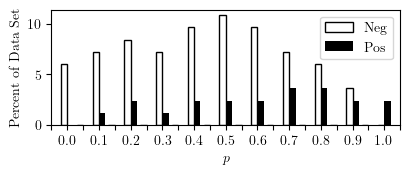

In [35]:
def Plot_Prediction_Wide(y_test, y_proba, filename, title):
    print ('Plot_Prediction()')
    print (filename)
    
    print ('y_test = ', y_test)
    print ('y_proba = ',y_proba)

#    y_test = y_test.numpy()
    A = pd.DataFrame(y_proba, columns=['HOSPITAL'])
    B = pd.DataFrame(y_test, columns=['HOSPITAL'])
    B = B.reset_index(drop=True)
    C = A[B['HOSPITAL']==0]
    D = A[B['HOSPITAL']==1]
#    print ("A = pd.DataFrame(y_proba, columns=['HOSPITAL'])")
#    display(A)
#    print ("B = pd.DataFrame(y_test, columns=['HOSPITAL'])")
#    display(B)
#    print ("C = A[B['HOSPITAL']==0]")
#    display(C)
#    print ("D = A[B['HOSPITAL']==1]")
#    display(D)
    n = 20
#    bins= [x/n - 1/(2*n) for x in range (-1, n+3)]
    bins= [x/n for x in range (-1, n+1)]
#    print ('Bins = ', bins)
    E = pd.cut(C['HOSPITAL'], bins=bins, include_lowest=True)
    F = pd.cut(D['HOSPITAL'], bins=bins, include_lowest=True)
#    print ("E = pd.cut(C['HOSPITAL'], bins=bins, include_lowest=True)")
#    display(E)
#    print ("F = pd.cut(D['HOSPITAL'], bins=bins, include_lowest=True)")
#    display(F)
    
    G = E.value_counts(sort=False)
    H = F.value_counts(sort=False)
#    print ("G = E.value_counts(sort=False)")
#    display(G)
#    print ("H = F.value_counts(sort=False)")
#    display(H)

    G = G/len(y_proba)*100
    H = H/len(y_proba)*100
#    print ("G = G/len(y_proba)*100")
#    display(G)
#    print ("H = H/len(y_proba)*100")
#    display(H)

    fig = plt.figure(figsize=(4.5,1.5)) # Create matplotlib figure
    ax = fig.add_subplot(111) # Create matplotlib axes
    
    G.plot(kind='bar', fill=False, ax=ax, width=0.4, position=1)
    H.plot(kind='bar', color='black', ax=ax, width=0.4, position=0)
    ticks = [n/20*i for i in range (-1,22)]
#    print ('ticks = ', ticks)
    plt.xticks(
        ticks = ticks,
        labels = ['','0.0', '', '0.1', '', '0.2', '', '0.3', '', '0.4', '', '0.5', '', '0.6', '', '0.7', '', '0.8', '', '0.9', '', '1.0', ''],
        rotation=0
    )
    ax.legend(['Neg', 'Pos'])
#    plt.title(title)
    plt.xlabel('$p$')
    plt.ylabel('Percent of Data Set')
    plt.savefig('./Images/' + filename + '_Pred_Wide.png', bbox_inches="tight")
    plt.savefig('./Images/' + filename + '_Pred_Wide.pgf', bbox_inches="tight")
    print ('./Images/' + filename + '_Pred_Wide.png')
    plt.show()
    plt.close()
    print ()

def Test_Plot_Prediction_Wide():
    
    y_proba = (
        [0.0]*5 + 
        [0.0]*0 + 
        [0.1]*6 + 
        [0.1]*1 + 
        [0.2]*7 + 
        [0.2]*2 + 
        [0.3]*6 + 
        [0.3]*1 + 
        [0.4]*8 + 
        [0.4]*2 + 
        [0.5]*9 + 
        [0.5]*2 + 
        [0.6]*8 + 
        [0.6]*2 + 
        [0.7]*6 + 
        [0.7]*3 + 
        [0.8]*5 + 
        [0.8]*3 + 
        [0.9]*3 + 
        [0.9]*2 + 
        [1.0]*0 + 
        [1.0]*2 
    )
    y_test = (
        [0]*5 + 
        [1]*0 + 
        [0]*6 + 
        [1]*1 + 
        [0]*7 + 
        [1]*2 + 
        [0]*6 + 
        [1]*1 + 
        [0]*8 + 
        [1]*2 + 
        [0]*9 + 
        [1]*2 + 
        [0]*8 + 
        [1]*2 + 
        [0]*6 + 
        [1]*3 + 
        [0]*5 + 
        [1]*3 + 
        [0]*3 + 
        [1]*2 + 
        [0]*0 + 
        [1]*2 
    )
    Plot_Prediction_Wide(y_test, y_proba, 'Test', 'Test')
    
Test_Plot_Prediction_Wide()

## Switching between FP/TP and Precision

$$\text{Precision} = \frac{TP}{FP+TP}$$

$$\frac{1}{\text{Precision}} = \frac{FP+TP}{TP} = \frac{FP}{TP} + \frac{TP}{TP} = \frac{FP}{TP} +  1$$

$$\frac{FP}{TP} + 1 = \frac{1}{\text{Precision}}$$

$$\frac{FP}{TP} = \frac{1}{\text{Precision}} - 1 = \frac{1}{\text{Precision}} - \frac{\text{Precision}}{\text{Precision}}  = \frac{1 - \text{Precision}}{\text{Precision}}$$

- In a previous version I had wanted $FP/TP$ to equal either 2.0, 1.0, or 0.5, indicating that we were willing to send 2 unnecessary ambulances for each necessary one, etc.  
    - $FP/TP = 2.0$ corresponds to precision = 1/3
    - $FP/TP = 1.0$ corresponds to precision = 1/2
    - $FP/TP = 0.5$ corresponds to precision = 2/3

- Neg/Pos corresponds to marginal precision similarly

In [36]:
def Value_Counts_y_proba(y_proba, filename):
#    print ()
    print ('Value_Counts_y_proba')
#    print (type(y_proba))
    Y_proba = pd.Series(y_proba)
    A = Y_proba.value_counts().reset_index(drop=True)
    n = len(y_proba)
    nA = len(A)
#    display(Y_proba)
#    display(A)
    B = A.cumsum()
#    display(B)
#    print (B[10])
#    print ()
    cutoff_95 = B.sub(0.95*n).abs().idxmin() + 1
    cutoff_90 = B.sub(0.90*n).abs().idxmin() + 1
    cutoff_80 = B.sub(0.80*n).abs().idxmin() + 1
    print (n, nA)
    print (cutoff_95)
#    print ()

    n100 = min(100, len(B)-1)
    n200 = min(200, len(B)-1)
    print ('n200 = ', n200)
    f = open('./Analyze_Proba/Value_Counts_y_proba.csv', 'a')
    f.write('%s,%d,%d,%0.4f,%d,%0.4f,%d,%0.4f,%d,%0.4f,%d,%0.4f,%d,%0.4f,%d,%0.4f,%d,%0.4f\n' % (
        filename, n, nA, nA/n, 
        cutoff_95, cutoff_95/n,
        cutoff_90, cutoff_90/n,
        cutoff_80, cutoff_80/n,
        B[10], B[10]/n,
        B[20], B[20]/n,
        B[n100], B[n100]/n,
        B[n200], B[n200]/n,
    ))
    f.close()
    
    H = Y_proba.value_counts().head(100)
    Filename = './Analyze_Proba/' + filename + '_Value_Counts.csv'
    H.to_csv(Filename)
    
    
    print ('Finished')
    return 0
    
def Create_Files_for_Value_Counts_y_proba():
    f = open('./Analyze_Proba/Value_Counts_y_proba.csv', 'w')
    f.write("Filename,n,nUnique,nUnique/n,95%,95%/n,90%,90%/n,80%,80%/n,B[10],B[10]/n,B[20],B[20]/n,B[100],B[100]/n,B[200],B[200]/n,\n")
    f.close()
    
#Create_Files_for_Value_Counts_y_proba()
    
    
def Test_Value_Counts_y_proba():
    A = [5]*50 + [6]*20 + [i for i in range (10,40)]*2 + [i for i in range (100,400)]
    Value_Counts_y_proba(A, 'Test')

Test_Value_Counts_y_proba()

    


Value_Counts_y_proba
430 332
310
n200 =  200
Finished


In [37]:
def Analyze_Prediction(y_test, y_proba, filename, title):
    print ('Analyze_Prediction()')
    print (filename)
    
    Value_Counts_y_proba(y_proba, filename)
    
#    print (y_test)
#    print (y_proba)
#    return 0
#    y_test = y_test.numpy()
    A = pd.DataFrame(y_proba, columns=['HOSPITAL'])
    B = pd.DataFrame(y_test, columns=['HOSPITAL'])
    B = B.reset_index(drop=True)
    C = A[B['HOSPITAL']==0]
    D = A[B['HOSPITAL']==1]
    print ('print (len(A), len(C), len(D), len(C) + len(D))')
    print (len(A), len(C), len(D), len(C) + len(D))

    N = len(C)
    P = len(D)
    
    ##### 10 bins
    n = 10
    bins= [x/n for x in range (-1, n+1)]
    print (bins)
    E = pd.cut(C['HOSPITAL'], bins=bins, include_lowest=True)
    F = pd.cut(D['HOSPITAL'], bins=bins, include_lowest=True)
    
    G = E.value_counts(sort=False)
    H = F.value_counts(sort=False)

    Analyze = pd.DataFrame()
    Analyze['Neg'] = G
    Analyze['Pos'] = H
    Analyze['p'] = bins[1:]
#    Analyze['Neg/Pos'] = Analyze['Neg']/Analyze['Pos']
    Analyze['mPrec'] = Analyze['Pos']/(Analyze['Pos'] + Analyze['Neg'])
    Analyze['TN'] = Analyze['Neg'].cumsum()
    Analyze['FP'] = N - Analyze['TN']
    Analyze['FN'] = Analyze['Pos'].cumsum()
    Analyze['TP'] = P - Analyze['FN']
#    Analyze['FP/TP'] = Analyze['FP']/Analyze['TP']
#    Analyze['FP+TP'] = Analyze['FP'] + Analyze['TP']
    Analyze['Prec'] = Analyze['TP']/(Analyze['FP'] + Analyze['TP'])
    Analyze['Rec'] =  Analyze['TP']/(Analyze['FN'] + Analyze['TP'])
    Analyze['$\hat{p}$'] = (Analyze['TP'] + Analyze['FP'])/len(y_proba)
    
    Analyze['Neg']=Analyze['Neg'].apply('{:,}'.format)
    Analyze['Pos']=Analyze['Pos'].apply('{:,}'.format)
    Analyze['TN']=Analyze['TN'].apply('{:,}'.format)
    Analyze['FP']=Analyze['FP'].apply('{:,}'.format)
    Analyze['FN']=Analyze['FN'].apply('{:,}'.format)
    Analyze['TP']=Analyze['TP'].apply('{:,}'.format)
#    Analyze['FP+TP']=Analyze['FP+TP'].apply('{:,}'.format)
    
#    Analyze['Neg/Pos']=Analyze['Neg/Pos'].apply('{:.2f}'.format)
    Analyze['mPrec']=Analyze['mPrec'].apply('{:.2f}'.format)
#    Analyze['FP/TP']=Analyze['FP/TP'].apply('{:.2f}'.format)
    Analyze['Prec']=Analyze['Prec'].apply('{:.2f}'.format)
    Analyze['Rec']=Analyze['Rec'].apply('{:.2f}'.format)
    Analyze['$\hat{p}$']=Analyze['$\hat{p}$'].apply('{:.2f}'.format)
        
#    Analyze.index.name = 'p'
    Analyze.set_index('p', inplace=True)
    print ('./Analyze_Proba/' + filename + '_10.tex')
    print (len(y_proba))
    display(Analyze)
    Analyze.to_csv('./Analyze_Proba/' + filename + '_10.csv', index=True)
    Analyze.to_latex(
        './Analyze_Proba/' + filename + '_10.tex', 
        index=True, 
        float_format="{:.2f}".format, 
        column_format='rrrrrrrrrrrrrr',
        escape=False
    )



    ##### 100 bins
    n = 100
    bins= [x/n for x in range (-1, n+1)]
    print (bins)
    E = pd.cut(C['HOSPITAL'], bins=bins, include_lowest=True)
    F = pd.cut(D['HOSPITAL'], bins=bins, include_lowest=True)
    
    G = E.value_counts(sort=False)
    H = F.value_counts(sort=False)

    Analyze = pd.DataFrame()
    Analyze['Neg'] = G
    Analyze['Pos'] = H
    Analyze['p'] = bins[1:]
#    Analyze['Neg/Pos'] = Analyze['Neg']/Analyze['Pos']
    Analyze['mPrec'] = Analyze['Pos']/(Analyze['Pos'] + Analyze['Neg'])
    Analyze['TN'] = Analyze['Neg'].cumsum()
    Analyze['FP'] = N - Analyze['TN']
    Analyze['FN'] = Analyze['Pos'].cumsum()
    Analyze['TP'] = P - Analyze['FN']
#    Analyze['FP/TP'] = Analyze['FP']/Analyze['TP']
#    Analyze['FP+TP'] = Analyze['FP'] + Analyze['TP']
    Analyze['Prec'] = Analyze['TP']/(Analyze['FP'] + Analyze['TP'])
    Analyze['Rec'] =  Analyze['TP']/(Analyze['FN'] + Analyze['TP'])
    Analyze['$\hat{p}$'] = (Analyze['TP'] + Analyze['FP'])/len(y_proba)
    
    A = Analyze.copy(deep=True)

    Analyze['Neg']=Analyze['Neg'].apply('{:,}'.format)
    Analyze['Pos']=Analyze['Pos'].apply('{:,}'.format)
    Analyze['TN']=Analyze['TN'].apply('{:,}'.format)
    Analyze['FP']=Analyze['FP'].apply('{:,}'.format)
    Analyze['FN']=Analyze['FN'].apply('{:,}'.format)
    Analyze['TP']=Analyze['TP'].apply('{:,}'.format)
#    Analyze['FP+TP']=Analyze['FP+TP'].apply('{:,}'.format)
    
#    Analyze['Neg/Pos']=Analyze['Neg/Pos'].apply('{:.2f}'.format)
    Analyze['mPrec']=Analyze['mPrec'].apply('{:.2f}'.format)
#    Analyze['FP/TP']=Analyze['FP/TP'].apply('{:.2f}'.format)
    Analyze['Prec']=Analyze['Prec'].apply('{:.2f}'.format)
    Analyze['Rec']=Analyze['Rec'].apply('{:.2f}'.format)
    Analyze['$\hat{p}$']=Analyze['$\hat{p}$'].apply('{:.2f}'.format)
        
#    Analyze.index.name = 'p'
    Analyze.set_index('p', inplace=True)
#    print ('./Analyze_Proba/' + filename + '_100.tex')
#    print (len(y_proba))
#    display(Analyze)
    Analyze.to_csv('./Analyze_Proba/' + filename + '_100.csv', index=True)
    Analyze.to_latex(
        './Analyze_Proba/' + filename + '_100.tex', 
        index=True, 
        float_format="{:.2f}".format, 
        column_format='rrrrrrrrrrrrrr',
        escape=False
    )
    
    # Append CSV files with results from multiple models
    A.set_index('p', inplace=True)
    A.insert(0, 'Filename', filename)
    
    # Remove rows with negligible number of samples
    A = A[A['Neg'] >= 20]
    A = A[A['Pos'] >= 20]
    
    
    A_closest = A.iloc[(A['mPrec'] - 0.333).abs().argsort()[:1]].head(1)
    A_closest.to_csv('./Analyze_Proba/mPrec_0_333.csv', mode='a', index=True, header=False)
    
    A_closest = A.iloc[(A['mPrec'] - 0.5).abs().argsort()[:1]].head(1)
    A_closest.to_csv('./Analyze_Proba/mPrec_0_5.csv', mode='a', index=True, header=False)
    
    A_closest = A.iloc[(A['mPrec'] - 0.667).abs().argsort()[:1]].head(1)
    A_closest.to_csv('./Analyze_Proba/mPrec_0_667.csv', mode='a', index=True, header=False)
    
    A_closest = A.iloc[(A['Prec'] - 0.333).abs().argsort()[:1]].head(1)
    A_closest.to_csv('./Analyze_Proba/Prec_0_333.csv', mode='a', index=True, header=False)
    
    A_closest = A.iloc[(A['Prec'] - 0.5).abs().argsort()[:1]].head(1)
    A_closest.to_csv('./Analyze_Proba/Prec_0_5.csv', mode='a', index=True, header=False)
    
    A_closest = A.iloc[(A['Prec'] - 0.667).abs().argsort()[:1]].head(1)
    A_closest.to_csv('./Analyze_Proba/Prec_0_667.csv', mode='a', index=True, header=False)
    
    A_closest = A.iloc[(A['$\hat{p}$'] - 0.05).abs().argsort()[:1]].head(1)
    A_closest.to_csv('./Analyze_Proba/p_hat_0_05.csv', mode='a', index=True, header=False)
    
    A_closest = A.iloc[(A['$\hat{p}$'] - 0.10).abs().argsort()[:1]].head(1)
    A_closest.to_csv('./Analyze_Proba/p_hat_0_10.csv', mode='a', index=True, header=False)
    
    A_closest = A.iloc[(A['$\hat{p}$'] - 0.15).abs().argsort()[:1]].head(1)
    A_closest.to_csv('./Analyze_Proba/p_hat_0_15.csv', mode='a', index=True, header=False)
    
    
def Create_Files_for_Analyze_Prediction():
    f = open('./Analyze_Proba/mPrec_0_5.csv', 'w')
    f.write("p,Filename,Neg,Pos,$m$Prec,TN,FP,FN,TP,Prec,Rec,$\hat{p}\n")
    f.close()
    f = open('./Analyze_Proba/mPrec_0_667.csv', 'w')
    f.write("p,Filename,Neg,Pos,$m$Prec,TN,FP,FN,TP,Prec,Rec,$\hat{p}\n")
    f.close()
    f = open('./Analyze_Proba/mPrec_0_333.csv', 'w')
    f.write("p,Filename,Neg,Pos,$m$Prec,TN,FP,FN,TP,Prec,Rec,$\hat{p}\n")
    f.close()
    f = open('./Analyze_Proba/Prec_0_5.csv', 'w')
    f.write("p,Filename,Neg,Pos,$m$Prec,TN,FP,FN,TP,Prec,Rec,$\hat{p}\n")
    f.close()
    f = open('./Analyze_Proba/Prec_0_667.csv', 'w')
    f.write("p,Filename,Neg,Pos,$m$Prec,TN,FP,FN,TP,Prec,Rec,$\hat{p}\n")
    f.close()
    f = open('./Analyze_Proba/Prec_0_333.csv', 'w')
    f.write("p,Filename,Neg,Pos,$m$Prec,TN,FP,FN,TP,Prec,Rec,$\hat{p}\n")
    f.close()
    f = open('./Analyze_Proba/p_hat_0_05.csv', 'w')
    f.write("p,Filename,Neg,Pos,$m$Prec,TN,FP,FN,TP,Prec,Rec,$\hat{p}\n")
    f.close()
    f = open('./Analyze_Proba/p_hat_0_10.csv', 'w')
    f.write("p,Filename,Neg,Pos,$m$Prec,TN,FP,FN,TP,Prec,Rec,$\hat{p}\n")
    f.close()
    f = open('./Analyze_Proba/p_hat_0_15.csv', 'w')
    f.write("p,Filename,Neg,Pos,$m$Prec,TN,FP,FN,TP,Prec,Rec,$\hat{p}\n")
    f.close()


#Create_Files_for_Analyze_Prediction()



In [38]:
def Test_Plot_Prediction_Zoom():
    print ('Idealized_Results()')
    # Set randomness
    np.random.seed(42) # NumPy
    random.seed(42) # Python
    tf.random.set_seed(42) # Tensorflow    

    shape, scale = 3.7, 0.1 # mean=4, std=2*sqrt(2)
    a = np.random.gamma(shape, scale, 150771)
    a = np.where(a>1.0, random.random(), a)
    
    shape, scale = 3.8, 0.1 # mean=4, std=2*sqrt(2)
    b = np.random.gamma(shape, scale, 26621)    
    b = np.where(b>1.0, random.random(), b)
    b = 1-b
    
    y_proba = np.concatenate((a,b),axis=0)
    y_pred = K.round(y_proba)
    y_test = [0]*len(a) + [1]*len(b)  
    
    display(y_proba[:20])
    display(y_pred[:20])
    
    Plot_Prediction(y_test, y_proba, 'Test', 'Test')    
    Plot_Prediction_Wide(y_test, y_proba, 'Test', 'Test')    
    Plot_Prediction_Zoom(y_test, y_proba, 'Test', 'Test', 0.45, 0.55)
    Analyze_Prediction(y_test, y_proba, 'Test', 'Test')    
    
#Test_Plot_Prediction_Zoom()

## ROC Curves

In [39]:
def ROC(y_test, y_proba, p_values, filename):
    print ('ROC()')
    print (filename)
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    N_median = np.median(y_proba[np.array(y_test)==0])
    P_median = np.median(y_proba[np.array(y_test)==1])
#    print ('N_median, P_median = ', N_median, P_median)

    m = np.quantile(y_proba,0.50)
    p = np.quantile(y_proba,0.25)
    q = np.quantile(y_proba,0.75)
    
    Y = []
    print ('p_values = ', p_values)
    for X in p_values:
        difference_array = np.absolute(thresholds-X)
        index = difference_array.argmin()
        F = fpr[index]
        T = tpr[index]
        Y.append([X,str(round(X,3)),F,T])
    
    auc_value = auc(fpr, tpr)
    auc_value = round(auc_value,3)
    fig = plt.figure(figsize=(2.0,1.5)) # Create matplotlib figure
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, color='black', label='AUC={:.3f}'.format(auc_value))
    
    for y in Y:
#        plt.plot([y[2]], [y[3]], marker="o", markersize=20, markeredgecolor="white", markerfacecolor="white")
#        plt.annotate(
#            y[1], # this is the text
#            (y[2], y[3]), # these are the coordinates to position the label
#            ha='center' # horizontal alignment can be left, right or center
#        )
        plt.text(
            y[2], y[3], # these are the coordinates to position the label
            y[1], # this is the text
            backgroundcolor='white', # horizontal alignment can be left, right or center
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='square,pad=0.3')
        )
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
#    plt.title('ROC with AUC {:.3f}'.format(auc_value))
    plt.legend(loc='best')
    plt.savefig('./Images/' + filename + '_ROC.png', bbox_inches="tight")
    plt.savefig('./Images/' + filename + '_ROC.pgf', bbox_inches="tight")
    print ('./Images/' + filename + '_ROC.png')
    plt.show()
    plt.close()
    print ()
    return 0

def Test_ROC():
    y_test = [0,0,0,0,0,1]*10000
#    y_proba = [abs(0.45 - y)+round(0.45*random.random(),2) for y in y_test]
    y_proba = [abs(0.45 - y)+round(0.45*random.normalvariate(mu=0.2, sigma=0.2),3) for y in y_test]
#    random.normalvariate(mu=0.0, sigma=1.0)
    y_test = np.array(y_test)
    y_proba = np.array(y_proba)
    print (y_test)
    print (y_proba)
    ROC(y_test, y_proba, [0.5], "tmp")
    
#Test_ROC()



## Build Idealized Results Plots
- The Plot_Prediciton and ROC_Curves functions take two lists (or np arrays) and a filename for saving the plots:
    - ROC(y_test, y_proba, filename):
    - Plot_Prediction(y_test, y_proba, filename):
    - y_test is the {0,1} binary and 
    - y_proba is the (0,1) continuous
- The Evaluate_Model(y_test, y_proba, y_pred, filename) takes three lists (or np arrays)
    - y_test is the {0,1} binary ground truth,
    - y_proba is the (0,1) continuous prediction, and
    - y_pred is the discrete {0,1} binary version of y_proba
- We want a 

Idealized_Results()
Move_Threshold()
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>
150771 26621


,0,1,2,3,4,5,6
0,t,TN,FP,FN,TP,TPR,FPR
1,0.0,0,150771,0,26621,1.0,1.0
2,0.1,4459,146312,242,26379,0.990909,0.970425
3,0.2,27821,122950,732,25889,0.972503,0.815475
4,0.3,62627,88144,1826,24795,0.931408,0.584622
5,0.4,94723,56048,3446,23175,0.870553,0.371743
6,0.5,117910,32861,6139,20482,0.769393,0.217953
7,0.6,132769,18002,10384,16237,0.609932,0.1194
8,0.7,141458,9313,15998,10623,0.399046,0.061769
9,0.8,146091,4680,22005,4616,0.173397,0.03104



Ideal
Plot_Prediction()
Ideal
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
./Images/Ideal_Pred.png


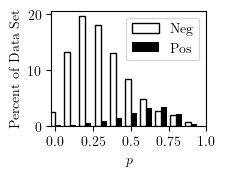


ROC()
Ideal
p_values =  [0.33685739600079256, 0.6559955071426624]
./Images/Ideal_ROC.png


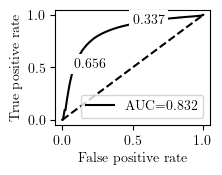


Evaluate_Model()
np.unique(y_proba) =  [0.00047927 0.00048926 0.00070029 ... 0.99977329 0.99986356 0.99991617]
np.unique(y_pred) =  [0 1]
[[117910  32861]
 [  6139  20482]]

[[0.66468612 0.18524511]
 [0.03460697 0.1154618 ]]


Ideal_Left
Plot_Prediction()
Ideal_Left
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
./Images/Ideal_Left_Pred.png


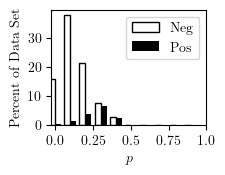


ROC()
Ideal_Left
p_values =  [0.33685739600079256, 0.5, 0.6559955071426624]
./Images/Ideal_Left_ROC.png


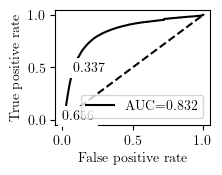


Evaluate_Model()
np.unique(y_proba) =  [0.00023963 0.00024463 0.00035014 ... 0.49988664 0.49993178 0.49995808]
np.unique(y_pred) =  [0]
[[150771      0]
 [ 26621      0]]

[[0.84993123 0.        ]
 [0.15006877 0.        ]]


Ideal_Left_Shifted
Shift_y_proba()

N_median = 0.168, P_median = 0.328, center = 0.248
N_median = 0.420, P_median = 0.580, center = 0.500

Plot_Prediction()
Ideal_Left_Shifted
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
./Images/Ideal_Left_Shifted_Pred.png


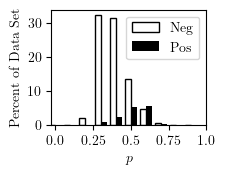


ROC()
Ideal_Left_Shifted
p_values =  []
./Images/Ideal_Left_Shifted_ROC.png


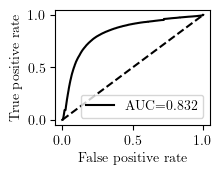


Evaluate_Model()
np.unique(y_proba) =  [0.25202641 0.2520314  0.25213692 ... 0.75167342 0.75171855 0.75174486]
np.unique(y_pred) =  [0 1]
[[117215  33556]
 [  6021  20600]]

[[0.66076824 0.18916298]
 [0.03394178 0.116127  ]]


Ideal_Left_Linear_Transform


TypeError: Linear_Transform_y_proba() takes 2 positional arguments but 4 were given

In [40]:
def Move_Threshold(y_proba, y_test):
    print ('Move_Threshold()')
    n = 10
    T = [x/n for x in range (n+1)]
    
    print (type(y_proba))
    print (type(y_test))
    y_test = np.array(y_test)
    print (type(y_test))
    N = y_proba[y_test==0]
    P = y_proba[y_test==1]
    print (len(N), len(P))

    A = [['t', 'TN', 'FP', 'FN', 'TP', 'TPR', 'FPR']]
    for t in T:
        TN = len(N[N<t])
        FP = len(N[N>t])
        FN = len(P[P<t])
        TP = len(P[P>t])
        TPR = TP/len(P)
        FPR = FP/len(N)
        A.append([t, TN, FP, FN, TP, TPR, FPR])
    display(pd.DataFrame(A))
    
    print ()


def Idealized_Results():
    print ('Idealized_Results()')
    # Set randomness
    np.random.seed(0) # NumPy
    random.seed(0) # Python
    tf.random.set_seed(0) # Tensorflow    

    shape, scale = 3.7, 0.1 # mean=4, std=2*sqrt(2)
    a = np.random.gamma(shape, scale, 150771)
    a = np.where(a>1.0, random.random(), a)
    
    shape, scale = 3.8, 0.1 # mean=4, std=2*sqrt(2)
    b = np.random.gamma(shape, scale, 26621)    
    b = np.where(b>1.0, random.random(), b)
    b = 1-b
    
    y_proba = np.concatenate((a,b),axis=0)
    Y_PROBA = np.concatenate((a,b),axis=0)
    y_pred = K.round(y_proba)
    y_test = [0]*len(a) + [1]*len(b)
    N_median = np.median(a)
    P_median = np.median(b)
    
    Move_Threshold(y_proba, y_test)
    
    filename = 'Ideal'
    print (filename)
    title = 'Original Example'
    Plot_Prediction(y_test, y_proba, filename, title)
    ROC(y_test, y_proba, [N_median, P_median], filename)    
    Evaluate_Model(y_test, y_proba, y_pred, 0.5, filename)    
    print ()
    
    filename = 'Ideal_Left'
    title = 'Never Ambulance'
    print (filename)
    y_proba = 0.5 * y_proba
    y_pred = K.round(y_proba)
    Plot_Prediction(y_test, y_proba, filename, title)
    ROC(y_test, y_proba, [N_median, 0.5, P_median], filename)    
    Evaluate_Model(y_test, y_proba, y_pred, 0.5, filename)    
    print ()

    filename = 'Ideal_Left_Shifted'
    title = ''
    print (filename)
    y_test, y_proba, y_pred, filename = Shift_y_proba(y_test, y_proba, y_pred, filename)
    Plot_Prediction(y_test, y_proba, filename, title)
    ROC(y_test, y_proba, [], filename)    
    Evaluate_Model(y_test, y_proba, y_pred, 0.5, filename)    
    print ()
    
    filename = 'Ideal_Left_Linear_Transform'
    title = ''
    print (filename)
    y_test, y_proba, y_pred, filename = Linear_Transform_y_proba(y_test, y_proba, y_pred, filename)
    Plot_Prediction(y_test, y_proba, filename, title)
    ROC(y_test, y_proba, [], filename)    
    Evaluate_Model(y_test, y_proba, y_pred, 0.5, filename)    
    print ()
    
    filename = 'Ideal_Right'
    title = 'Always Ambulance'
    print (filename)
    y_proba = 0.5 * Y_PROBA + 0.5
    y_pred = K.round(y_proba)
    Plot_Prediction(y_test, y_proba, filename, title)
    ROC(y_test, y_proba, [N_median, 0.5, P_median], filename)    
    Evaluate_Model(y_test, y_proba, y_pred, 0.5, filename)    
    print ()

    filename = 'Ideal_Right_Shifted'
    title = ''
    print (filename)
    y_test, y_proba, y_pred, filename = Shift_y_proba(y_test, y_proba, y_pred, filename)
    Plot_Prediction(y_test, y_proba, filename, title)
    ROC(y_test, y_proba, [], filename)    
    Evaluate_Model(y_test, y_proba, y_pred, 0.5, filename)    
    print ()
    
    filename = 'Ideal_Right_Linear_Transform'
    title = ''
    print (filename)
    y_test, y_proba, y_pred, filename = Linear_Transform_y_proba(y_test, y_proba, y_pred, filename)
    Plot_Prediction(y_test, y_proba, filename, title)
    ROC(y_test, y_proba, [], filename)    
    Evaluate_Model(y_test, y_proba, y_pred, 0.5, filename)    
    print ()
    
    y_proba = Y_PROBA
    y_pred = K.round(y_proba)
    y_test = [0]*len(a) + [1]*len(b)
    
    filename = 'Ideal_Tight'
    title = 'Tight'
    print (filename)
    y_proba = 0.2 * Y_PROBA + 0.4
    y_pred = K.round(y_proba)
    Plot_Prediction(y_test, y_proba, filename, title)
    ROC(y_test, y_proba, [N_median, 0.5, P_median], filename)    
    Evaluate_Model(y_test, y_proba, y_pred, 0.5, filename)    
    print ()
   
    y_proba = Y_PROBA
    y_pred = K.round(y_proba)
    y_test = [0]*len(a) + [1]*len(b)
    
    filename = 'Ideal_Shift_to_FP_equals_r_TP'
    title = 'Transformed'
    print (filename)
    Plot_Prediction_Zoom(y_test, y_proba, 'Test', 'Test', 0.53, 0.73)    
    y_test, y_proba, y_pred, p_target, filename_tmp = Shift_y_proba_to_FP_equals_r_TP(y_test, y_proba, 2.0, filename)
    print ('type(y_test) = ', type(y_test))
    N = y_proba[np.array(y_test)==0]
    P = y_proba[np.array(y_test)==1]
    display(N)
    N_median = np.median(N)
    P_median = np.median(P)
    Plot_Prediction(y_test, y_proba, filename, title)
    Plot_Prediction_Wide(y_test, y_proba, filename, title)
    Plot_Prediction_Zoom(y_test, y_proba, filename, title, 0.4, 0.6)
    ROC(y_test, y_proba, [N_median, P_median], filename)    
    Evaluate_Model(y_test, y_proba, y_pred, 0.5, filename)    
    print ()
    
    

    
Idealized_Results()

In [ ]:
def Awful_Results():
    # Set randomness
    np.random.seed(42) # NumPy
    random.seed(42) # Python
    tf.random.set_seed(42) # Tensorflow    
    
    
    shape, scale = 1.0, 0.5 # mean=4, std=2*sqrt(2)
    a = np.random.random(600)   
    
    b = np.random.random(100)    
    b = np.where(b>1.0, random.random(), b)
    b = 1-b
    
    y_proba = np.concatenate((a,b),axis=0)
    y_pred = K.round(y_proba)
    y_test = [0]*len(a) + [1]*len(b)
    
    filename = 'Awful'
    title = 'Awful'
    Plot_Prediction(y_test, y_proba, filename, title)
    ROC(y_test, y_proba, [], filename)    
    Evaluate_Model(y_test, y_proba, y_pred, 0.5, filename)    
    
#Awful_Results()

## Run Models

In [ ]:
def Run_Models(Features = 'Hard', Tomek = 0, Version = 1):
    
    if Features == 'Hard':
        read_filename_features = '_Thin'
        write_filename_features = '_Hard'
    if Features == 'Medium':
        read_filename_features = '_Really_Thin'
        write_filename_features = '_Medium'
    if Features == 'Easy':
        read_filename_features = '_Thin_to_Minimal'
        write_filename_features = '_Easy'
    if Tomek==0:
        read_filename_tomek = '_before_Tomek'
        write_filename_tomek = '_Tomek_0'
    if Tomek==1:
        read_filename_tomek = '_after_Tomek'
        write_filename_tomek = '_Tomek_1'
    if Tomek==2:
        read_filename_tomek = '_after_Tomek_Twice'
        write_filename_tomek = '_Tomek_2'
    if Version==1:
        filename_version = '_v1'
        random_seed = 0
    if Version==2:
        filename_version = '_v2'
        random_seed = 42

    X_train = pd.read_csv('../../Big_Files/X_train' + read_filename_features + read_filename_tomek + filename_version + '.csv')
    y_train = pd.read_csv('../../Big_Files/y_train' + read_filename_features + read_filename_tomek + filename_version + '.csv').squeeze()
    X_test = pd.read_csv('../../Big_Files/X_test' + read_filename_features + read_filename_tomek + filename_version + '.csv')
    y_test = pd.read_csv('../../Big_Files/y_test' + read_filename_features + read_filename_tomek + filename_version + '.csv').squeeze()

    N = len(y_train)
    n = len(y_train[y_train==1])
    p = (N-n)/n
    alpha_balanced = p/(p+1)
    print ('p = ', p)
    print ('alpha_balanced = ', alpha_balanced)
    
    np.random.seed(random_seed) # NumPy
    random.seed(random_seed) # Python
    tf.random.set_seed(random_seed) # Tensorflow

    
    print ()
    print ('------------------------------------------')
    filename_model = 'LRC'
    filename = filename_model + write_filename_features + write_filename_tomek + '_alpha_0_5' + filename_version
    title = 'LogReg'
    Logistic_Regression_Classifier(X_train, X_test, y_train, y_test, 0.5, filename, title)

    np.random.seed(random_seed) # NumPy
    random.seed(random_seed) # Python
    tf.random.set_seed(random_seed) # Tensorflow
    

    print ()
    print ('------------------------------------------')
    filename_model = 'LRC'
    filename = filename_model + write_filename_features + write_filename_tomek + '_alpha_balanced' + filename_version
    title = 'LogReg'
    Logistic_Regression_Classifier(X_train, X_test, y_train, y_test, alpha_balanced, filename, title)
    
    np.random.seed(random_seed) # NumPy
    random.seed(random_seed) # Python
    tf.random.set_seed(random_seed) # Tensorflow
    
    print ()
    print ('------------------------------------------')
    filename_model = 'BRFC'
    filename = filename_model + write_filename_features + write_filename_tomek + '_alpha_0_5' + filename_version
    title = 'BRForest'
    Balanced_Random_Forest_Classifier(X_train, X_test, y_train, y_test, 0.5, filename, title)

    np.random.seed(random_seed) # NumPy
    random.seed(random_seed) # Python
    tf.random.set_seed(random_seed) # Tensorflow
     
    print ()
    print ('------------------------------------------')
    filename_model = 'BRFC'
    filename = filename_model + write_filename_features + write_filename_tomek + '_alpha_balanced' + filename_version
    title = 'BRForest'
    Balanced_Random_Forest_Classifier(X_train, X_test, y_train, y_test, alpha_balanced, filename, title)

    np.random.seed(random_seed) # NumPy
    random.seed(random_seed) # Python
    tf.random.set_seed(random_seed) # Tensorflow
    
    print ()
    print ('------------------------------------------')
    filename_model = 'AdaBoost'
    filename = filename_model + write_filename_features + write_filename_tomek + '' + filename_version
    title = 'AdaBoost'
    AdaBoost(X_train, X_test, y_train, y_test, filename, title)
    
    np.random.seed(random_seed) # NumPy
    random.seed(random_seed) # Python
    tf.random.set_seed(random_seed) # Tensorflow
    
    print ()
    print ('------------------------------------------')
    filename_model = 'Bagging'
    filename = filename_model + write_filename_features + write_filename_tomek + '' + filename_version
    title = 'BalBag'
    Bagging(X_train, X_test, y_train, y_test, filename, title)

    np.random.seed(random_seed) # NumPy
    random.seed(random_seed) # Python
    tf.random.set_seed(random_seed) # Tensorflow
    
    print ()
    print ('------------------------------------------')
    filename_model = 'RUSBoost'
    filename = filename_model + write_filename_features + write_filename_tomek + '' + filename_version
    title = 'RUSBoost'
    estimator = DecisionTreeClassifier(
        max_depth=1,
#        class_weight={0:(1+r_target)/(2*r_target), 1:(1+r_target)/(2*1)},
    )
    RUSBoost_Classifier(X_train, X_test, y_train, y_test, estimator, filename, title)


    np.random.seed(random_seed) # NumPy
    random.seed(random_seed) # Python
    tf.random.set_seed(random_seed) # Tensorflow
    
    print ()
    print ('------------------------------------------')
    filename_model = 'EEC'
    filename = filename_model + write_filename_features + write_filename_tomek + '' + filename_version
    title = 'EasyEns'
    Easy_Ensemble_Classifier(X_train, X_test, y_train, y_test, filename, title)
    
    
    np.random.seed(random_seed) # NumPy
    random.seed(random_seed) # Python
    tf.random.set_seed(random_seed) # Tensorflow
 
    print ()
    print ('------------------------------------------')
    filename_model = 'KBFC'
    filename = filename_model + write_filename_features + write_filename_tomek + '_alpha_balanced_gamma_0_0' + filename_version
    title = 'Focal $\gamma=0.0$'
    print (filename)
    print ('alpha_balanced = ', alpha_balanced)
    gamma = 0.0
    epochs=20
    Keras_Binary_Focal_Crossentropy(X_train, X_test, y_train, y_test, alpha_balanced, gamma, epochs, filename, title)

    np.random.seed(random_seed) # NumPy
    random.seed(random_seed) # Python
    tf.random.set_seed(random_seed) # Tensorflow
        
    print ()
    print ('------------------------------------------')
    filename_model = 'KBFC'
    filename = filename_model + write_filename_features + write_filename_tomek + '_alpha_0_5_gamma_0_0' + filename_version
    title = 'Focal $\gamma=0.0$'
    print (filename)
    gamma = 0.0
    epochs=20
    Keras_Binary_Focal_Crossentropy(X_train, X_test, y_train, y_test, 0.5, gamma, epochs, filename, title)

    np.random.seed(random_seed) # NumPy
    random.seed(random_seed) # Python
    tf.random.set_seed(random_seed) # Tensorflow
 
    print ()
    print ('------------------------------------------')
    filename_model = 'OBFC'
    filename = filename_model + write_filename_features + write_filename_tomek + '_alpha_0_5_gamma_0_0_5_gamma_1_1_0' + filename_version
    gamma_0 = 0.5
    gamma_1 = 1.0
    epochs = 20
    title = 'OBFC $\alpha = 0.5' + '\gamma_0 = ' + "{:.2f}".format(gamma_0) + ' \gamma_1 = ' + "{:.2f}".format(gamma_1) + '$'
    print (title)
    Our_Binary_Focal_Crossentropy(X_train, X_test, y_train, y_test, 0.5, gamma_0, gamma_1, epochs, filename, title)
    
    np.random.seed(random_seed) # NumPy
    random.seed(random_seed) # Python
    tf.random.set_seed(random_seed) # Tensorflow
 
    print ()
    print ('------------------------------------------')
    filename_model = 'OBFC'
    filename = filename_model + write_filename_features + write_filename_tomek + '_alpha_balanced_gamma_0_1_0_gamma_1_0_5' + filename_version
    gamma_0 = 1.0
    gamma_1 = 0.5
    epochs = 20
    title = 'OBFC $\alpha = 0.5' + '\gamma_0 = ' + "{:.2f}".format(gamma_0) + ' \gamma_1 = ' + "{:.2f}".format(gamma_1) + '$'
    print (title)
    Our_Binary_Focal_Crossentropy(X_train, X_test, y_train, y_test, 0.5, gamma_0, gamma_1, epochs, filename, title)
    
    np.random.seed(random_seed) # NumPy
    random.seed(random_seed) # Python
    tf.random.set_seed(random_seed) # Tensorflow
 
    print ()
    print ('------------------------------------------')
    filename_model = 'OBFC'
    filename = filename_model + write_filename_features + write_filename_tomek + '_alpha_balanced_gamma_0_0_5_gamma_1_2_0' + filename_version
    gamma_0 = 0.5
    gamma_1 = 2.0
    epochs = 20
    title = 'OBFC $\alpha = 0.5' + '\gamma_0 = ' + "{:.2f}".format(gamma_0) + ' \gamma_1 = ' + "{:.2f}".format(gamma_1) + '$'
    print (title)
    Our_Binary_Focal_Crossentropy(X_train, X_test, y_train, y_test, 0.5, gamma_0, gamma_1, epochs, filename, title)
    
    np.random.seed(random_seed) # NumPy
    random.seed(random_seed) # Python
    tf.random.set_seed(random_seed) # Tensorflow
 
    print ()
    print ('------------------------------------------')
    filename_model = 'OBFC'
    filename = filename_model + write_filename_features + write_filename_tomek + '_alpha_balanced_gamma_0_0_5_gamma_1_1_0' + filename_version
    gamma_0 = 0.5
    gamma_1 = 1.0
    epochs = 20
    title = 'OBFC $\alpha = ' + "{:.2f}".format(alpha_balanced) + '\gamma_0 = ' + "{:.2f}".format(gamma_0) + ' \gamma_1 = ' + "{:.2f}".format(gamma_1) + '$'
    print (title)
    Our_Binary_Focal_Crossentropy(X_train, X_test, y_train, y_test, alpha_balanced, gamma_0, gamma_1, epochs, filename, title)
    
    np.random.seed(random_seed) # NumPy
    random.seed(random_seed) # Python
    tf.random.set_seed(random_seed) # Tensorflow
 
    print ()
    print ('------------------------------------------')
    filename_model = 'OBFC'
    filename = filename_model + write_filename_features + write_filename_tomek + '_alpha_balanced_gamma_0_1_0_gamma_1_0_5' + filename_version
    gamma_0 = 1.0
    gamma_1 = 0.5
    epochs = 20
    title = 'OBFC $\alpha = ' + "{:.2f}".format(alpha_balanced) + '\gamma_0 = ' + "{:.2f}".format(gamma_0) + ' \gamma_1 = ' + "{:.2f}".format(gamma_1) + '$'
    print (title)
    Our_Binary_Focal_Crossentropy(X_train, X_test, y_train, y_test, alpha_balanced, gamma_0, gamma_1, epochs, filename, title)
    
    np.random.seed(random_seed) # NumPy
    random.seed(random_seed) # Python
    tf.random.set_seed(random_seed) # Tensorflow
 
    print ()
    print ('------------------------------------------')
    filename_model = 'OBFC'
    filename = filename_model + write_filename_features + write_filename_tomek + '_alpha_balanced_gamma_0_0_5_gamma_1_2_0' + filename_version
    gamma_0 = 0.5
    gamma_1 = 2.0
    epochs = 20
    title = 'OBFC $\alpha = ' + "{:.2f}".format(alpha_balanced) + '\gamma_0 = ' + "{:.2f}".format(gamma_0) + ' \gamma_1 = ' + "{:.2f}".format(gamma_1) + '$'
    print (title)
    Our_Binary_Focal_Crossentropy(X_train, X_test, y_train, y_test, alpha_balanced, gamma_0, gamma_1, epochs, filename, title)
    


    

In [ ]:
Create_Files_for_Value_Counts_y_proba()
Create_Files_for_Analyze_Prediction()


In [ ]:
%%time
Run_Models(Features = 'Hard', Tomek = 0, Version = 1)
#Run_Models(Features = 'Hard', Tomek = 1, Version = 1)
#Run_Models(Features = 'Hard', Tomek = 2, Version = 1)
Run_Models(Features = 'Medium', Tomek = 0, Version = 1)
#Run_Models(Features = 'Medium', Tomek = 1, Version = 1)
#Run_Models(Features = 'Medium', Tomek = 2, Version = 1)
Run_Models(Features = 'Easy', Tomek = 0, Version = 1)

Run_Models(Features = 'Hard', Tomek = 0, Version = 2)
#Run_Models(Features = 'Hard', Tomek = 1, Version = 2)
#Run_Models(Features = 'Hard', Tomek = 2, Version = 2)
Run_Models(Features = 'Medium', Tomek = 0, Version = 2)
#Run_Models(Features = 'Medium', Tomek = 1, Version = 2)
#Run_Models(Features = 'Medium', Tomek = 2, Version = 2)
Run_Models(Features = 'Easy', Tomek = 0, Version = 2)
##